# Preparación

In [0]:
#Grupo 4
#Miguel Espinoze y Mariana Salinas

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LightSource

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%cd /content/drive/My Drive/imagenes
import os
from PIL import Image
import torchvision.transforms as transforms

/content/drive/My Drive/imagenes


In [0]:
from torch.utils.data import Dataset, DataLoader
from skimage import io, transform
from torch.utils import data
class Imagenet550(Dataset):

    def __init__(self, root_dir, list_IDs, transform=None):
        self.root_dir = root_dir
        self.filenames = os.listdir(self.root_dir)
        self.transform = transform
        self.list_IDs = list_IDs
    

    def __len__(self):
        return len(self.list_IDs)

    def __getitem__(self, indice):
        #print("indice:", indice)
        #print(os.listdir(os.getcwd())[indice])
        img_name = os.path.join(self.root_dir,self.filenames[indice])
        image = io.imread(img_name)
        assert len(image.shape) == 3
        assert image.shape[2] == 3
        #print("image.shape", image.shape)
        if self.transform:
            image = self.transform(image)
        label = self.list_IDs[indice]
        #print("label", label)
        return (image, label)

In [0]:
%cd /content/drive/My Drive
#importar clases del modelo y ver el indice en que estas están
import json
with open("imagenet_class_index.json") as f:
  imagenet_classes = {}
  imagenet_names = {}
  for i,x in json.load(f).items():
    imagenet_classes[int(i)] = x[1]
    imagenet_names[int(i)] = x[0]
print(imagenet_classes)
print(imagenet_names)

/content/drive/My Drive
{0: 'tench', 1: 'goldfish', 2: 'great_white_shark', 3: 'tiger_shark', 4: 'hammerhead', 5: 'electric_ray', 6: 'stingray', 7: 'cock', 8: 'hen', 9: 'ostrich', 10: 'brambling', 11: 'goldfinch', 12: 'house_finch', 13: 'junco', 14: 'indigo_bunting', 15: 'robin', 16: 'bulbul', 17: 'jay', 18: 'magpie', 19: 'chickadee', 20: 'water_ouzel', 21: 'kite', 22: 'bald_eagle', 23: 'vulture', 24: 'great_grey_owl', 25: 'European_fire_salamander', 26: 'common_newt', 27: 'eft', 28: 'spotted_salamander', 29: 'axolotl', 30: 'bullfrog', 31: 'tree_frog', 32: 'tailed_frog', 33: 'loggerhead', 34: 'leatherback_turtle', 35: 'mud_turtle', 36: 'terrapin', 37: 'box_turtle', 38: 'banded_gecko', 39: 'common_iguana', 40: 'American_chameleon', 41: 'whiptail', 42: 'agama', 43: 'frilled_lizard', 44: 'alligator_lizard', 45: 'Gila_monster', 46: 'green_lizard', 47: 'African_chameleon', 48: 'Komodo_dragon', 49: 'African_crocodile', 50: 'American_alligator', 51: 'triceratops', 52: 'thunder_snake', 53: 'ri

In [0]:
#clases reales del dataset elegido 
clases = ['snorkel','goldfish','koala','jellyfish','Lhasa','gazelle','missile','mushroom','orange', 'red_wine']
etiquetas = []
values = list(imagenet_classes.values())
for elem in clases:
  etiquetas.append(values.index(elem))

print(etiquetas)

[801, 1, 105, 107, 204, 353, 657, 947, 950, 966]


In [0]:
classes_names = ['n00444937','n01443537','n01882714','n01910747','n02098413',
           'n02423022','n04008634','n07734744','n07747607', 'n07891726']

diccionario = dict(zip(classes_names, etiquetas))

%cd /content/drive/My Drive/imagenes

all_labels = []
names = os.listdir(os.getcwd())
for i in range(len(names)):
  for j in range(len(classes_names)):
    if classes_names[j] in names[i]:
      all_labels.append(diccionario[classes_names[j]])
      break

print(all_labels)

/content/drive/My Drive/imagenes
[801, 801, 801, 801, 801, 801, 801, 801, 801, 801, 801, 801, 801, 801, 801, 801, 801, 801, 801, 801, 801, 801, 801, 801, 801, 801, 801, 801, 801, 801, 801, 801, 801, 801, 801, 801, 801, 801, 801, 801, 801, 801, 801, 801, 801, 801, 801, 801, 801, 801, 801, 801, 801, 801, 1, 1, 1, 1, 801, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 1

0 (375, 500, 3)
1 (125, 200, 3)
2 (281, 500, 3)
3 (375, 500, 3)


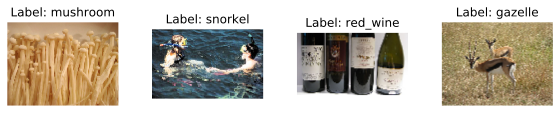

In [0]:
#os.getcwd() = /content/drive/My Drive/imagenes
data = Imagenet550(os.getcwd(), all_labels)

fig = plt.figure(figsize=(8,6))
import random

for i in range(len(data)):
    n = random.randint(0, len(data)) #se toma un elemento al azar
    item = data[n]
    sample = item[0]    #item[0] es la imagen
                        #item[1] es la etiqueta
    print(i, sample.shape)

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Label: {}'.format(imagenet_classes[item[1]]))
    ax.axis('off')
    plt.imshow(sample)

    if i == 3:
        plt.show()
        break

In [0]:
from torchvision.transforms import ToTensor

class Rescale(object):

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, image):
        image = transform.resize(image, (self.output_size, self.output_size))

        return image

name of the image:  n07891726_16.jpg
size of the image:  torch.Size([3, 224, 224])
label 966


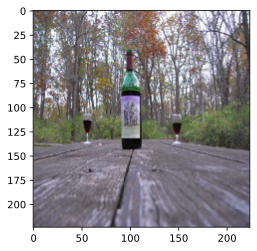

In [0]:
composed = transforms.Compose([Rescale(224),
                               ToTensor()])

# Apply each of the above transforms on sample.
i = random.randint(0, len(data))
fig = plt.figure()
sample = data[i][0]
print("name of the image: ", os.listdir(os.getcwd())[i])
transformed_sample = composed(sample)
print("size of the image: ", transformed_sample.shape)
print("label", data[i][1])
plt.tight_layout()
plt.imshow(transformed_sample.numpy().transpose(1,2,0))

plt.show()

# Modelo y dataset

In [0]:
import torch
import torch.nn as nn
%cd /content/drive/My Drive/imagenes

#Se crea la transformada que se usará en el dataset
transformada = transforms.Compose([Rescale(224),
                                   ToTensor()])

#Se crea el dataset
transformed_dataset = Imagenet550(root_dir=os.getcwd(), list_IDs=all_labels, 
                                           transform=transformada)

#Cargador de los datos
transformed_loader = DataLoader(transformed_dataset, batch_size = 1, shuffle=False)

/content/drive/My Drive/imagenes


In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #Se usa cuda si esta disponible
print(device)

from torchvision import models

model_cnn = models.vgg16(pretrained=True, progress=True)    #Modelo vgg16
model_cnn.cuda()

############# Importante ###############
#Para evaluar los métodos se coloca en modo evaluación
model_cnn.eval()
#Para el algoritmo de defensa se coloca en modo train

cuda:0


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:04<00:00, 113MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [0]:
### Para ver las imagenes más facilmente

from torchvision.transforms import ToPILImage
to_pil = ToPILImage()

# PGD

In [0]:
def pgd(model, X, y, epsilon=0.2, alpha=0.01, num_iter=10):
    delta = torch.zeros_like(X, requires_grad=True)
        
    for t in range(num_iter):
        loss = nn.CrossEntropyLoss()(model(X + delta), y)
        loss.backward()
        delta.data = (delta + alpha*delta.grad.detach().sign()).clamp(-epsilon,epsilon)
        delta.grad.zero_()
    return delta.detach()

In [0]:
adversarios_pgd = []
for i, data in enumerate(transformed_loader):
    x, y = data
    x, y = x.to(device, dtype=torch.float), y.to(device)
    noise = pgd(model_cnn, x, y, 0.04, 0.04)    #se usa el método pgd_new
    pert = x + noise
    adversarios_pgd.append(pert.clamp(0,1).cpu())
    print("Imagen ", i)

Imagen  0
Imagen  1
Imagen  2
Imagen  3
Imagen  4
Imagen  5
Imagen  6
Imagen  7
Imagen  8
Imagen  9
Imagen  10
Imagen  11
Imagen  12
Imagen  13
Imagen  14
Imagen  15
Imagen  16
Imagen  17


KeyboardInterrupt: ignored

In [0]:
%cd /content/drive/My Drive/"adversarios pgd"

for i, item in enumerate(adversarios_pgd):
    pil_image = to_pil(item.squeeze())
    pil_image.save("{}".format(names[i]))
print("Saved")

/content/drive/My Drive/adversarios pgd
Saved


# FGSM

In [0]:
def fgsm(model, X, y, epsilon=0.2):
    loss_fn = nn.CrossEntropyLoss()
    """ Construct FGSM adversarial examples on the examples X"""
    delta = torch.zeros_like(X, requires_grad=True)
    loss = loss_fn(model(X + delta), y) #loss
    loss.backward() #backpropagation
    return epsilon * delta.grad.detach().sign() # gradiente #sign # sign*eps

In [0]:
#El otro método daba resultados distintos, este parece más confiable

adversarios_fgsm = []
for i, data in enumerate(transformed_loader):
    x, y = data
    x, y = x.to(device, dtype=torch.float), y.to(device)
    noise = fgsm(model_cnn, x, y, 0.04)
    pert = x + noise
    adversarios_fgsm.append(pert.clamp(0,1).cpu())
    print("Imagen ", i)

In [0]:
%cd /content/drive/My Drive/"adversarios fgsm"
for i, item in enumerate(adversarios_fgsm):
    pil_image = to_pil(item.squeeze())
    pil_image.save("{}".format(names[i]))
print("Saved")

/content/drive/My Drive/adversarios fgsm
Saved


# Algoritmo de defensa

In [0]:
train_size = int(0.8 * len(transformed_dataset))    #Tamaño del conjunto de train
test_size = len(transformed_dataset) - train_size   #Tamaño del conjunto de test

train_dataset, test_dataset = torch.utils.data.random_split(transformed_dataset, [train_size, test_size])   #Se divide el dataset en train y test
train_loader = DataLoader(train_dataset, batch_size = 32, shuffle=True)  #Se cargan los conjunto de train y test
test_loader = DataLoader(test_dataset, batch_size = 32, shuffle=True)

In [0]:
%cd /content/drive/My Drive/"adversarios pgd"

adversary_dataset = Imagenet550(root_dir=os.getcwd(), list_IDs=all_labels, transform=transformada)

adv_train_dataset, adv_test_dataset = torch.utils.data.random_split(adversary_dataset, [train_size, test_size])   #Se divide el dataset en train y test
adv_train_loader = DataLoader(adv_train_dataset, batch_size = 32, shuffle=True)  #Se cargan los conjunto de train y test
adv_test_loader = DataLoader(adv_test_dataset, batch_size = 1, shuffle=True)

/content/drive/My Drive/adversarios pgd


0 torch.Size([3, 224, 224])
1 torch.Size([3, 224, 224])
2 torch.Size([3, 224, 224])
3 torch.Size([3, 224, 224])


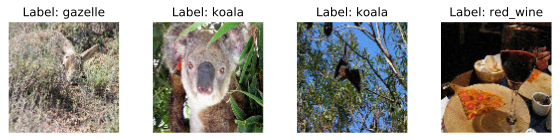

In [0]:
fig = plt.figure(figsize=(8,6))
import random

for i in range(len(adversary_dataset)):
    n = random.randint(0, len(adversary_dataset)) #se toma un elemento al azar
    item = adversary_dataset[n]
    sample = item[0]    #item[0] es la imagen
                        #item[1] es la etiqueta
    print(i, sample.shape)

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Label: {}'.format(imagenet_classes[item[1]]))
    ax.axis('off')
    plt.imshow(sample.numpy().transpose(1,2,0))

    if i == 3:
        plt.show()
        break

## Prueba en red sin entrenar

In [0]:
model_cnn2 = models.vgg16(pretrained=True, progress=True)    #Modelo vgg16
model_cnn2.cuda()

############# Importante ###############
#Para evaluar los métodos se coloca en modo evaluación
model_cnn2.eval()
#Para el algoritmo de defensa se coloca en modo train

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [0]:
### Test con las imágenes normales antes de entrenar

correct = 0
total = 0
for x, y in test_loader:
    x, y = x.to(device, dtype=torch.float), y.to(device)
    test_prediction = model_cnn2(x)
    output, y_predicted = torch.max(test_prediction.data, 1)
    correct += (y_predicted == y).sum().item()
    total += y.size(0)

#Accuracy
accuracy = 100*correct/total
print("Accuracy para imágenes antes de entrenar {0:.3f}%".format(accuracy))

Accuracy para imágenes antes de entrenar 51.351%


In [0]:
### Test con los ejemplos adversarios antes de entrenar

correct = 0
total = 0
for x, y in adv_test_loader:
    x, y = x.to(device, dtype=torch.float), y.to(device)
    test_prediction = model_cnn2(x)
    output, y_predicted = torch.max(test_prediction.data, 1)
    correct += (y_predicted == y).sum().item()
    total += y.size(0)
    
#Accuracy
accuracy = 100*correct/total
print("Accuracy para ejemplos adversarios antes de entrenar {0:.3f}%".format(accuracy))

Accuracy para ejemplos adversarios antes de entrenar 0.000%


tensor([107], device='cuda:0')
y: 107, label: jellyfish
y_predicted: 584, label: hair_slide



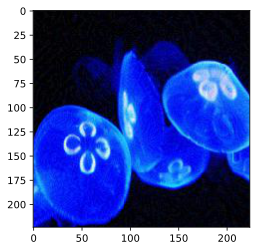

In [0]:
### Ejemplos adversarios que clasifica mal la red

for x, y in adv_test_loader:
    x, y = x.to(device, dtype=torch.float), y.to(device)
    test_prediction = model_cnn2(x)
    output, y_predicted = torch.max(test_prediction.data, 1)
    print(y)
    plt.imshow(x[0].cpu().numpy().transpose(1,2,0))
    print("y: {}, label: {}".format(y[0].item(), imagenet_classes[y[0].item()]))
    print("y_predicted: {}, label: {}\n".format(y_predicted[0].item(), imagenet_classes[y_predicted[0].item()]))
    break

## Entrenamiento

In [0]:
import torch.optim as optim

#funcion de loss
loss_fn = nn.CrossEntropyLoss()

#optimizador
adam = optim.Adam(model_cnn.parameters())


In [0]:
model_cnn.train()
largo = len(train_dataset)
loss_array = []
for epoch in range(20):
    loss_epoch = 0
    for x, y in adv_train_loader:
        x, y = x.to(device, dtype=torch.float), y.to(device)

        predicted = model_cnn(x)
        #se calcula el error entre la prediccion y el valor real
        loss = loss_fn(predicted, y)
        loss_epoch += loss.item()
        loss.backward()     #backpropagation del error a toda la red
    
        adam.step()         #optimizador actualiza los pesos
        adam.zero_grad()    #el optimizador se hace cero
    #loss_array.append(loss_epoch/largo)
    print("Epoch {0:d}, loss: {1:f}".format(epoch + 1, loss_epoch/largo))

Epoch 1, loss: 0.256504
Epoch 2, loss: 0.086066
Epoch 3, loss: 0.078732
Epoch 4, loss: 0.076838
Epoch 5, loss: 0.075985
Epoch 6, loss: 0.074846
Epoch 7, loss: 0.073656
Epoch 8, loss: 0.071582
Epoch 9, loss: 0.076289
Epoch 10, loss: 0.071622
Epoch 11, loss: 0.067433
Epoch 12, loss: 0.073199
Epoch 13, loss: 0.068007
Epoch 14, loss: 0.065749
Epoch 15, loss: 0.063784
Epoch 16, loss: 0.064413
Epoch 17, loss: 0.061444
Epoch 18, loss: 0.063199
Epoch 19, loss: 0.062287
Epoch 20, loss: 0.058723


In [0]:
new_loss_array = []
for i in range(len(loss_array)):
    if i%14 == 13:
        print(i)
        new_loss_array.append(loss_array[i])

13
27
41
55
69
83
97
111
125
139
153
167
181
195
209
223
237
251
265
279


/content/drive/My Drive


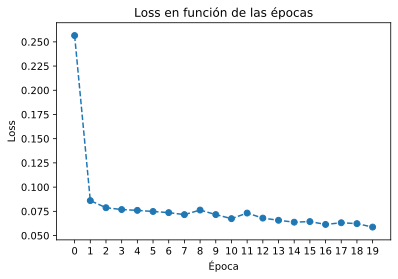

In [0]:
plt.plot(np.arange(20), new_loss_array, linestyle='dashed')
plt.scatter(np.arange(20), new_loss_array)
plt.title("Loss en función de las épocas")
plt.xlabel('Época')
plt.ylabel('Loss')
plt.xticks(np.arange(20))

%cd /content/drive/My Drive
plt.savefig("loss.png")

## Test

In [0]:
#Test
        
model_cnn.eval()

correct = 0
total = 0
for x, y in adv_test_loader:
    x, y = x.to(device, dtype=torch.float), y.to(device)
    test_prediction = model_cnn(x)
    output, y_predicted = torch.max(test_prediction.data, 1)
    correct += (y_predicted == y).sum().item()
    total += y.size(0)
    
#Accuracy
accuracy = 100*correct/total
print("Accuracy para ejemplos adversarios después de entrenar {0:.3f}%".format(accuracy))

Accuracy para ejemplos adversarios después de entrenar 33.333%


In [0]:
#Test imagenes
        
model_cnn.eval()

correct = 0
total = 0
for x, y in test_loader:
    x, y = x.to(device, dtype=torch.float), y.to(device)
    test_prediction = model_cnn(x)
    output, y_predicted = torch.max(test_prediction.data, 1)
    correct += (y_predicted == y).sum().item()
    total += y.size(0)
    
#Accuracy
accuracy = 100*correct/total
print("Accuracy para imágenes después de entrenar {0:.3f}%".format(accuracy))

Accuracy para imágenes después de entrenar 46.847%
